In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv("Training.csv")
test=pd.read_csv("Testing.csv")

In [3]:
train.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   

          prognosis  Unnamed: 133  
0  Fungal infection           NaN  
1  Fungal infection           NaN  
2  Fungal infection           NaN  
3  Fungal infection           NaN  
4  Fungal infection           NaN  

[5 rows x 134 columns]

In [4]:
test.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze            prognosis  
0                  0     Fungal infection  
1                  0              Allergy  
2                  0                 GERD  
3                  0  Chronic cholestasis  
4                  0        Drug Reaction  

[5 rows x 133 columns]

In [5]:
train=train.drop(["Unnamed: 133"],axis=1)

In [6]:
train.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [7]:
test.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [8]:
P = train[["prognosis"]]
X = train.drop(["prognosis"],axis=1)
Y = test.drop(["prognosis"],axis=1)

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,P,test_size=0.2,random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [11]:
rf= RandomForestClassifier(random_state=42)
model_rf = rf.fit(xtrain,ytrain)
tr_pred_rf = model_rf.predict(xtrain)
ts_pred_rf = model_rf.predict(xtest)

print("training accuracy is:",accuracy_score(ytrain,tr_pred_rf))
print("testing accuracy is:",accuracy_score(ytest,ts_pred_rf))

C:\Users\gowth\AppData\Local\Temp\ipykernel_5952\3170499915.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = rf.fit(xtrain,ytrain)


training accuracy is: 1.0
testing accuracy is: 1.0


In [12]:
test.join(pd.DataFrame(model_rf.predict(Y),columns=["predicted"]))[["prognosis","predicted"]]

prognosis  \
0                          Fungal infection   
1                                   Allergy   
2                                      GERD   
3                       Chronic cholestasis   
4                             Drug Reaction   
5                       Peptic ulcer diseae   
6                                      AIDS   
7                                 Diabetes    
8                           Gastroenteritis   
9                          Bronchial Asthma   
10                            Hypertension    
11                                 Migraine   
12                     Cervical spondylosis   
13             Paralysis (brain hemorrhage)   
14                                 Jaundice   
15                                  Malaria   
16                              Chicken pox   
17                                   Dengue   
18                                  Typhoid   
19                              hepatitis A   
20                              Hepatitis B   
21                              Hepatitis C   
22                              Hepatitis D   
23                              Hepatitis E   
24                      Alcoholic hepatitis   
25                             Tuberculosis   
26                              Common Cold   
27                                Pneumonia   
28             Dimorphic hemmorhoids(piles)   
29                             Heart attack   
30                           Varicose veins   
31                           Hypothyroidism   
32                          Hyperthyroidism   
33                             Hypoglycemia   
34                          Osteoarthristis   
35                                Arthritis   
36  (vertigo) Paroymsal  Positional Vertigo   
37                                     Acne   
38                  Urinary tract infection   
39                                Psoriasis   
40                                 Impetigo   
41                         Fungal infection   

                                  predicted  
0                          Fungal infection  
1                                   Allergy  
2                                      GERD  
3                       Chronic cholestasis  
4                             Drug Reaction  
5                       Peptic ulcer diseae  
6                                      AIDS  
7                                 Diabetes   
8                           Gastroenteritis  
9                          Bronchial Asthma  
10                            Hypertension   
11                                 Migraine  
12                     Cervical spondylosis  
13             Paralysis (brain hemorrhage)  
14                                 Jaundice  
15                                  Malaria  
16                              Chicken pox  
17                                   Dengue  
18                                  Typhoid  
19                              hepatitis A  
20                              Hepatitis B  
21                              Hepatitis C  
22                              Hepatitis D  
23                              Hepatitis E  
24                      Alcoholic hepatitis  
25                             Tuberculosis  
26                              Common Cold  
27                                Pneumonia  
28             Dimorphic hemmorhoids(piles)  
29                             Heart attack  
30                           Varicose veins  
31                           Hypothyroidism  
32                          Hyperthyroidism  
33                             Hypoglycemia  
34                          Osteoarthristis  
35                                Arthritis  
36  (vertigo) Paroymsal  Positional Vertigo  
37                                     Acne  
38                  Urinary tract infection  
39                                Psoriasis  
40                                 Impetigo  
41                              Chicken pox

In [13]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [14]:
svm= SVC()
model_svm = svm.fit(xtrain,ytrain)
tr_pred_rf = model_svm.predict(xtrain)
ts_pred_rf = model_svm.predict(xtest)

print("training accuracy is:",accuracy_score(ytrain,tr_pred_rf))
print("testing accuracy is:",accuracy_score(ytest,ts_pred_rf))

C:\Users\gowth\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training accuracy is: 1.0
testing accuracy is: 1.0


In [15]:
test.join(pd.DataFrame(model_svm.predict(Y),columns=["predicted"]))[["prognosis","predicted"]]

prognosis  \
0                          Fungal infection   
1                                   Allergy   
2                                      GERD   
3                       Chronic cholestasis   
4                             Drug Reaction   
5                       Peptic ulcer diseae   
6                                      AIDS   
7                                 Diabetes    
8                           Gastroenteritis   
9                          Bronchial Asthma   
10                            Hypertension    
11                                 Migraine   
12                     Cervical spondylosis   
13             Paralysis (brain hemorrhage)   
14                                 Jaundice   
15                                  Malaria   
16                              Chicken pox   
17                                   Dengue   
18                                  Typhoid   
19                              hepatitis A   
20                              Hepatitis B   
21                              Hepatitis C   
22                              Hepatitis D   
23                              Hepatitis E   
24                      Alcoholic hepatitis   
25                             Tuberculosis   
26                              Common Cold   
27                                Pneumonia   
28             Dimorphic hemmorhoids(piles)   
29                             Heart attack   
30                           Varicose veins   
31                           Hypothyroidism   
32                          Hyperthyroidism   
33                             Hypoglycemia   
34                          Osteoarthristis   
35                                Arthritis   
36  (vertigo) Paroymsal  Positional Vertigo   
37                                     Acne   
38                  Urinary tract infection   
39                                Psoriasis   
40                                 Impetigo   
41                         Fungal infection   

                                  predicted  
0                          Fungal infection  
1                                   Allergy  
2                                      GERD  
3                       Chronic cholestasis  
4                             Drug Reaction  
5                       Peptic ulcer diseae  
6                                      AIDS  
7                                 Diabetes   
8                           Gastroenteritis  
9                          Bronchial Asthma  
10                            Hypertension   
11                                 Migraine  
12                     Cervical spondylosis  
13             Paralysis (brain hemorrhage)  
14                                 Jaundice  
15                                  Malaria  
16                              Chicken pox  
17                                   Dengue  
18                                  Typhoid  
19                              hepatitis A  
20                              Hepatitis B  
21                              Hepatitis C  
22                              Hepatitis D  
23                              Hepatitis E  
24                      Alcoholic hepatitis  
25                             Tuberculosis  
26                              Common Cold  
27                                Pneumonia  
28             Dimorphic hemmorhoids(piles)  
29                             Heart attack  
30                           Varicose veins  
31                           Hypothyroidism  
32                          Hyperthyroidism  
33                             Hypoglycemia  
34                          Osteoarthristis  
35                                Arthritis  
36  (vertigo) Paroymsal  Positional Vertigo  
37                                     Acne  
38                  Urinary tract infection  
39                                Psoriasis  
40                                 Impetigo  
41                         Fungal infection

In [16]:
nb = GaussianNB()
model_nb = nb.fit(xtrain,ytrain)
tr_pred_rf = model_nb.predict(xtrain)
ts_pred_rf = model_nb.predict(xtest)

print("training accuracy is:",accuracy_score(ytrain,tr_pred_rf))
print("testing accuracy is:",accuracy_score(ytest,ts_pred_rf))

C:\Users\gowth\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training accuracy is: 1.0
testing accuracy is: 1.0


In [17]:
test.join(pd.DataFrame(model_nb.predict(Y),columns=["predicted"]))[["prognosis","predicted"]]

prognosis  \
0                          Fungal infection   
1                                   Allergy   
2                                      GERD   
3                       Chronic cholestasis   
4                             Drug Reaction   
5                       Peptic ulcer diseae   
6                                      AIDS   
7                                 Diabetes    
8                           Gastroenteritis   
9                          Bronchial Asthma   
10                            Hypertension    
11                                 Migraine   
12                     Cervical spondylosis   
13             Paralysis (brain hemorrhage)   
14                                 Jaundice   
15                                  Malaria   
16                              Chicken pox   
17                                   Dengue   
18                                  Typhoid   
19                              hepatitis A   
20                              Hepatitis B   
21                              Hepatitis C   
22                              Hepatitis D   
23                              Hepatitis E   
24                      Alcoholic hepatitis   
25                             Tuberculosis   
26                              Common Cold   
27                                Pneumonia   
28             Dimorphic hemmorhoids(piles)   
29                             Heart attack   
30                           Varicose veins   
31                           Hypothyroidism   
32                          Hyperthyroidism   
33                             Hypoglycemia   
34                          Osteoarthristis   
35                                Arthritis   
36  (vertigo) Paroymsal  Positional Vertigo   
37                                     Acne   
38                  Urinary tract infection   
39                                Psoriasis   
40                                 Impetigo   
41                         Fungal infection   

                                  predicted  
0                          Fungal infection  
1                                   Allergy  
2                                      GERD  
3                       Chronic cholestasis  
4                             Drug Reaction  
5                       Peptic ulcer diseae  
6                                      AIDS  
7                                 Diabetes   
8                           Gastroenteritis  
9                          Bronchial Asthma  
10                            Hypertension   
11                                 Migraine  
12                     Cervical spondylosis  
13             Paralysis (brain hemorrhage)  
14                                 Jaundice  
15                                  Malaria  
16                              Chicken pox  
17                                   Dengue  
18                                  Typhoid  
19                              hepatitis A  
20                              Hepatitis B  
21                              Hepatitis C  
22                              Hepatitis D  
23                              Hepatitis E  
24                      Alcoholic hepatitis  
25                             Tuberculosis  
26                              Common Cold  
27                                Pneumonia  
28             Dimorphic hemmorhoids(piles)  
29                             Heart attack  
30                           Varicose veins  
31                           Hypothyroidism  
32                          Hyperthyroidism  
33                             Hypoglycemia  
34                          Osteoarthristis  
35                                Arthritis  
36  (vertigo) Paroymsal  Positional Vertigo  
37                                     Acne  
38                  Urinary tract infection  
39                                Psoriasis  
40                                 Impetigo  
41                         Fungal infection

In [18]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [20]:
dftest = pd.read_csv('Testing.csv')
dftrain = pd.read_csv('Training.csv')

In [21]:
dftrain.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   

          prognosis  Unnamed: 133  
0  Fungal infection           NaN  
1  Fungal infection           NaN  
2  Fungal infection           NaN  
3  Fungal infection           NaN  
4  Fungal infection           NaN  

[5 rows x 134 columns]

In [22]:
dftest.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze            prognosis  
0                  0     Fungal infection  
1                  0              Allergy  
2                  0                 GERD  
3                  0  Chronic cholestasis  
4                  0        Drug Reaction  

[5 rows x 133 columns]

In [23]:
dftrain.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...   blackheads     scurring  skin_peeling  \
count       4920.000000  ...  4920.000000  4920.000000   4920.000000   
mean           0.021951  ...     0.021951     0.021951      0.023171   
std            0.146539  ...     0.146539     0.146539      0.150461   
min            0.000000  ...     0.000000     0.000000      0.000000   
25%            0.000000  ...     0.000000     0.000000      0.000000   
50%            0.000000  ...     0.000000     0.000000      0.000000   
75%            0.000000  ...     0.000000     0.000000      0.000000   
max            1.000000  ...     1.000000     1.000000      1.000000   

       silver_like_dusting  small_dents_in_nails  inflammatory_nails  \
count          4920.000000           4920.000000         4920.000000   
mean              0.023171              0.023171            0.023171   
std               0.150461              0.150461            0.150461   
min               0.000000              0.000000            0.000000   
25%               0.000000              0.000000            0.000000   
50%               0.000000              0.000000            0.000000   
75%               0.000000              0.000000            0.000000   
max               1.000000              1.000000            1.000000   

           blister  red_sore_around_nose  yellow_crust_ooze  Unnamed: 133  
count  4920.000000           4920.000000        4920.000000           0.0  
mean      0.023171              0.023171           0.023171           NaN  
std       0.150461              0.150461           0.150461           NaN  
min       0.000000              0.000000           0.000000           NaN  
25%       0.000000              0.000000           0.000000           NaN  
50%       0.000000              0.000000           0.000000           NaN  
75%       0.000000              0.000000           0.000000           NaN  
max       1.000000              1.000000           1.000000           NaN  

[8 rows x 133 columns]

In [24]:
dftest.describe()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  42.000000  42.000000             42.000000            42.000000   
mean    0.166667   0.190476              0.023810             0.047619   
std     0.377195   0.397437              0.154303             0.215540   
min     0.000000   0.000000              0.000000             0.000000   
25%     0.000000   0.000000              0.000000             0.000000   
50%     0.000000   0.000000              0.000000             0.000000   
75%     0.000000   0.000000              0.000000             0.000000   
max     1.000000   1.000000              1.000000             1.000000   

       shivering     chills  joint_pain  stomach_pain    acidity  \
count  42.000000  42.000000   42.000000     42.000000  42.000000   
mean    0.023810   0.166667    0.142857      0.047619   0.047619   
std     0.154303   0.377195    0.354169      0.215540   0.215540   
min     0.000000   0.000000    0.000000      0.000000   0.000000   
25%     0.000000   0.000000    0.000000      0.000000   0.000000   
50%     0.000000   0.000000    0.000000      0.000000   0.000000   
75%     0.000000   0.000000    0.000000      0.000000   0.000000   
max     1.000000   1.000000    1.000000      1.000000   1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples  blackheads   scurring  \
count         42.000000  ...           42.000000   42.000000  42.000000   
mean           0.023810  ...            0.023810    0.023810   0.023810   
std            0.154303  ...            0.154303    0.154303   0.154303   
min            0.000000  ...            0.000000    0.000000   0.000000   
25%            0.000000  ...            0.000000    0.000000   0.000000   
50%            0.000000  ...            0.000000    0.000000   0.000000   
75%            0.000000  ...            0.000000    0.000000   0.000000   
max            1.000000  ...            1.000000    1.000000   1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count     42.000000            42.000000             42.000000   
mean       0.047619             0.023810              0.023810   
std        0.215540             0.154303              0.154303   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails    blister  red_sore_around_nose  yellow_crust_ooze  
count           42.000000  42.000000             42.000000          42.000000  
mean             0.023810   0.023810              0.047619           0.023810  
std              0.154303   0.154303              0.215540           0.154303  
min              0.000000   0.000000              0.000000           0.000000  
25%              0.000000   0.000000              0.000000           0.000000  
50%              0.000000   0.000000              0.000000           0.000000  
75%              0.000000   0.000000              0.000000           0.000000  
max              1.000000   1.000000              1.000000           1.000000  

[8 rows x 132 columns]

In [25]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [26]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [27]:
dftrain.shape

(4920, 134)

In [28]:
dftest.shape

(42, 133)

In [29]:
dftrain.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [30]:
dftest.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [31]:
print(type(dftrain), type(dftest))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [32]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [33]:
null_columns = dftrain.columns[dftrain.isnull().any()]
dftrain[null_columns].isnull().sum()

Unnamed: 133    4920
dtype: int64

In [34]:
dftrain.drop('Unnamed: 133', axis=1, inplace=True)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [35]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [36]:
null_columns=dftest.columns[dftest.isnull().any()]
dftest[null_columns].isnull().sum()

Series([], dtype: float64)

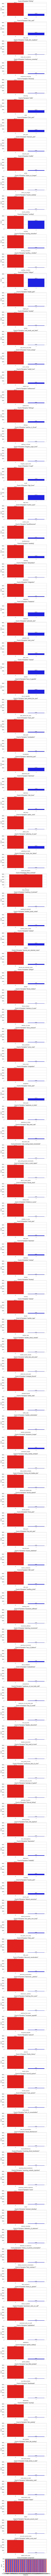

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dftrain is your DataFrame
columns = list(dftrain.columns)

# Set a Seaborn style
sns.set(style="whitegrid")

# Define colors
colors = ['red', 'blue']

# Create subplots
fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 3 * len(columns)))

# Iterate through each column
for i, column in enumerate(columns):
    # Plot the count for each symptom
    sns.countplot(x=column, data=dftrain, palette=colors, ax=axs[i])
    
    # Add labels and title
    axs[i].set_title("Count of Symptom \"" + column + "\"", fontsize=14)
    axs[i].set_xlabel(column, fontsize=12)
    axs[i].set_ylabel("Count", fontsize=12)
    
    # Add percentage labels on top of bars
    total = len(dftrain[column])
    for p in axs[i].patches:
        height = p.get_height()
        axs[i].text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{height/total:.1%}', ha="center", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

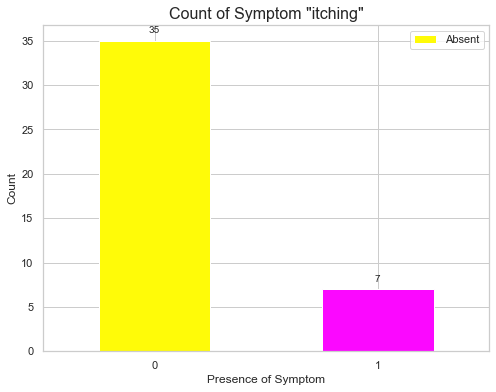

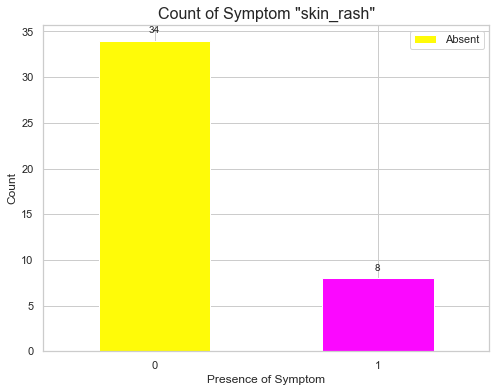

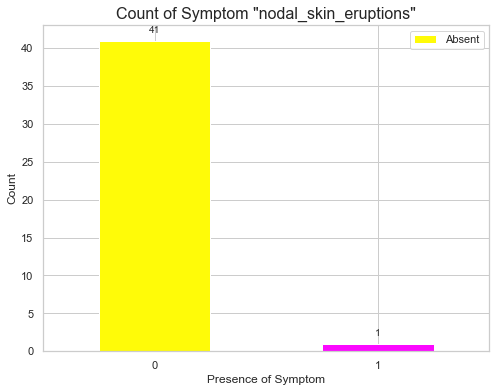

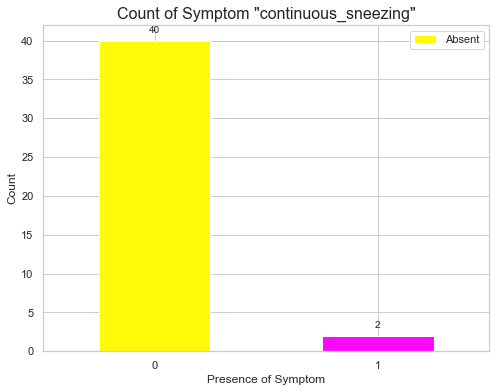

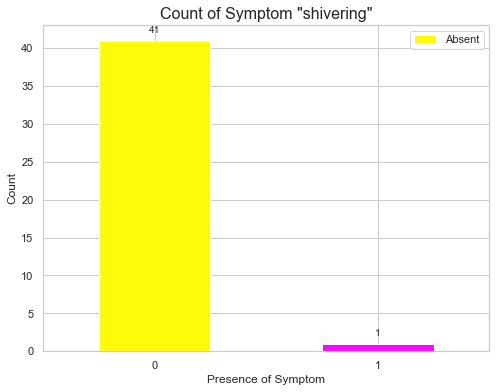

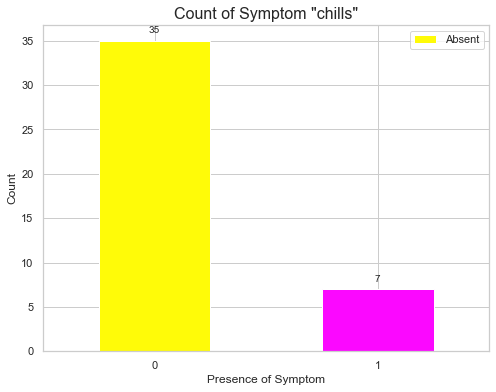

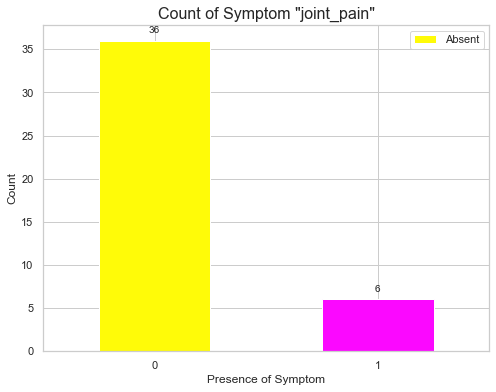

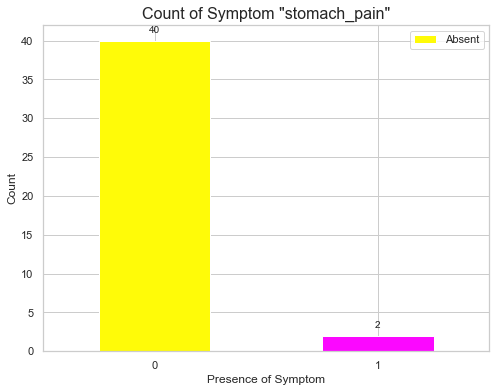

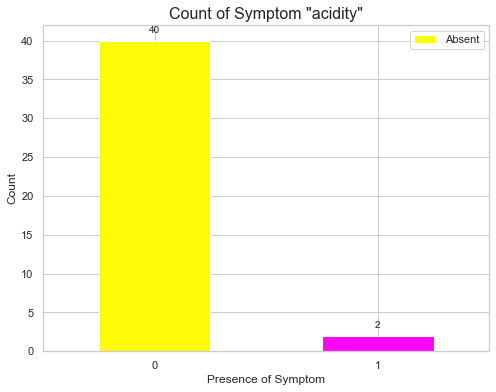

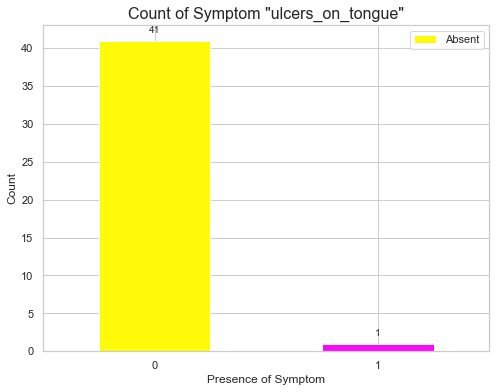

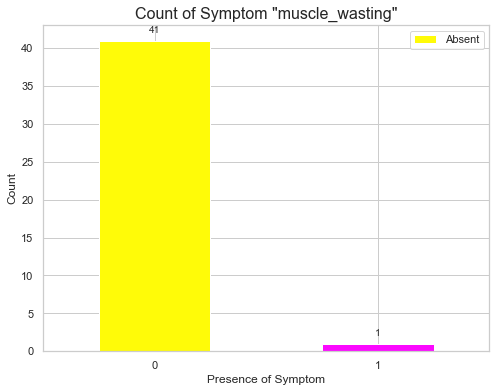

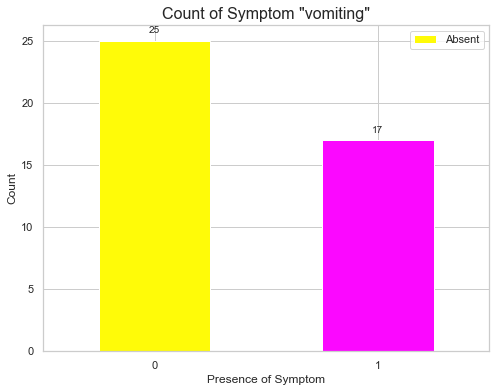

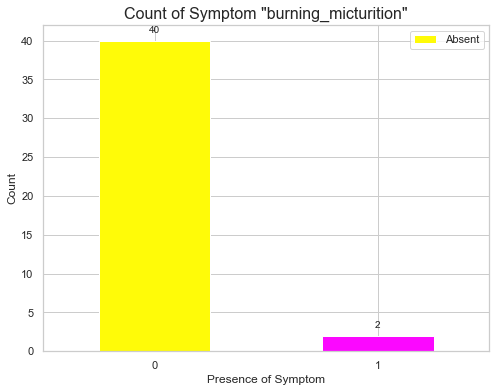

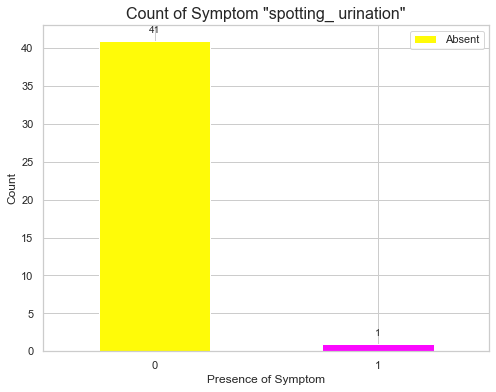

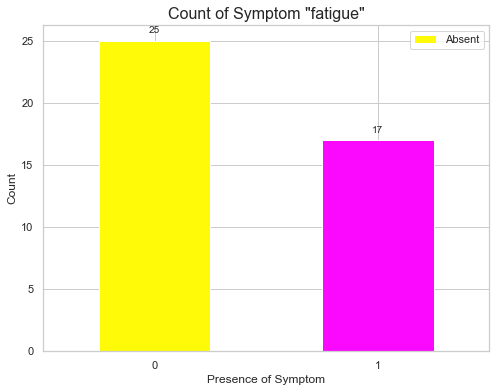

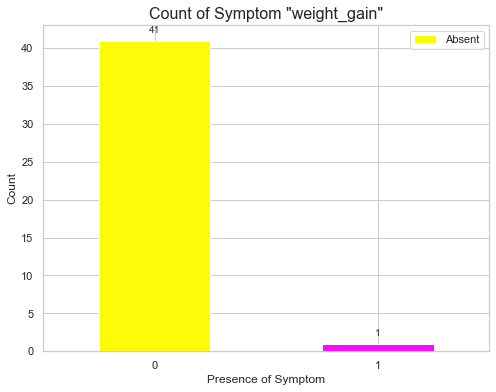

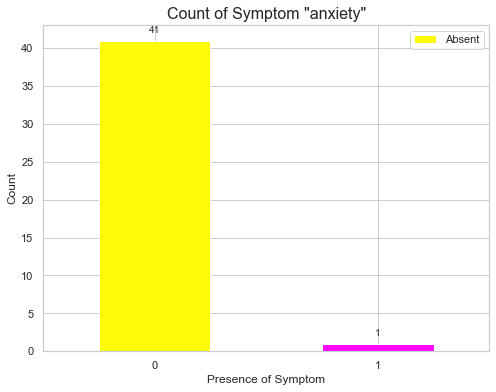

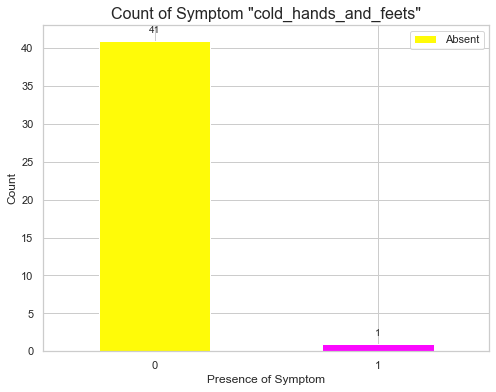

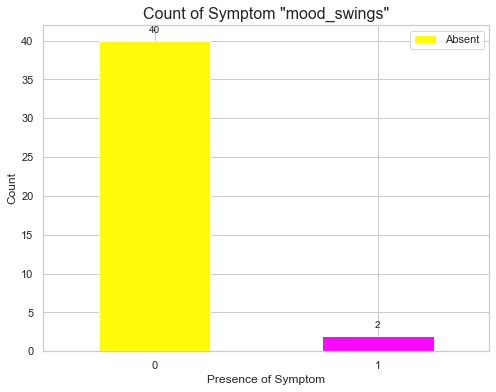

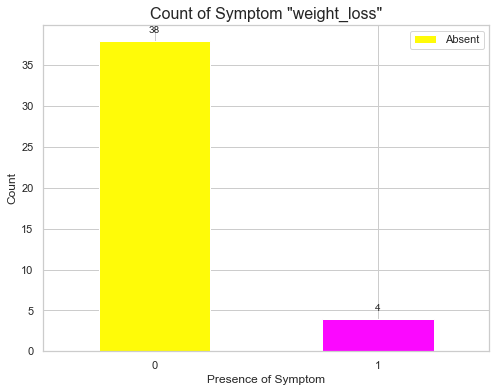

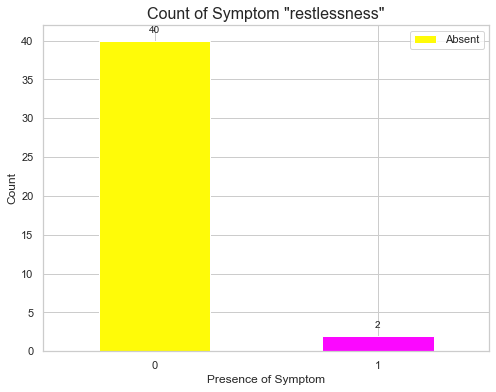

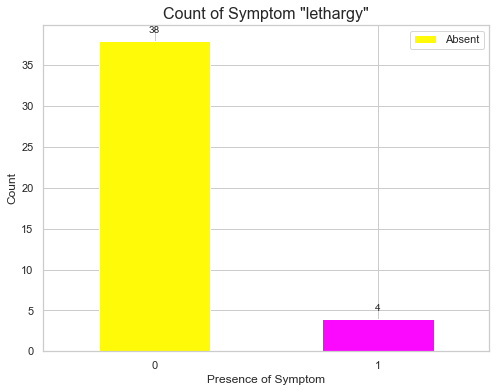

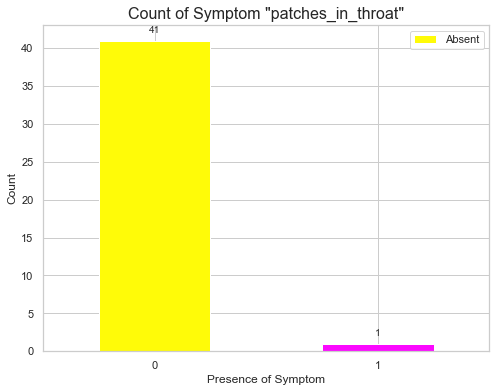

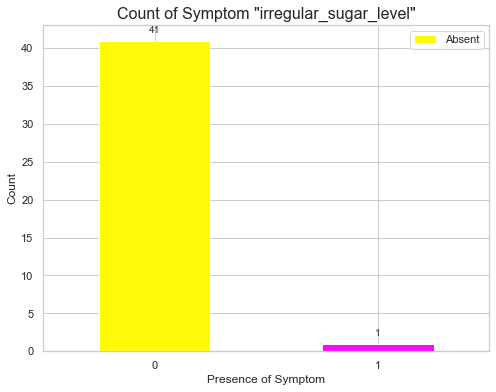

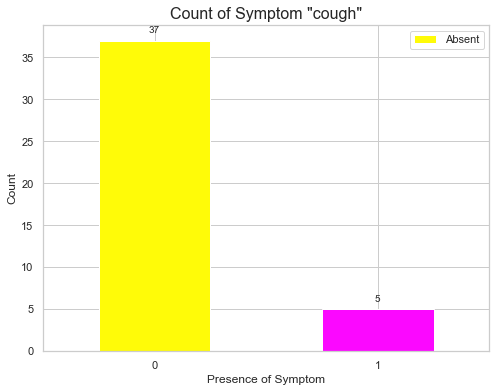

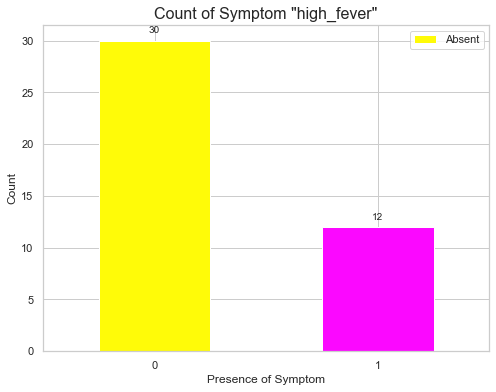

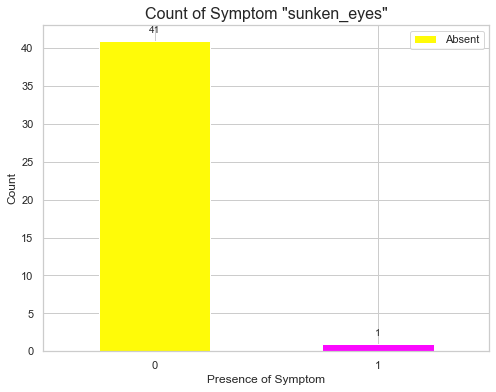

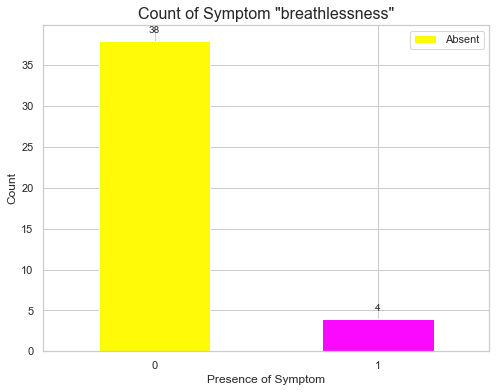

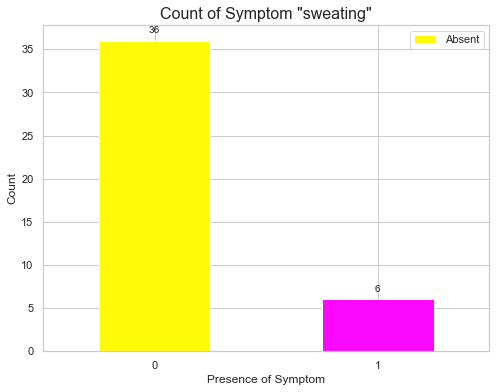

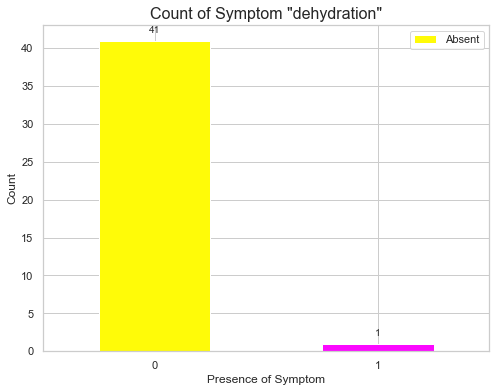

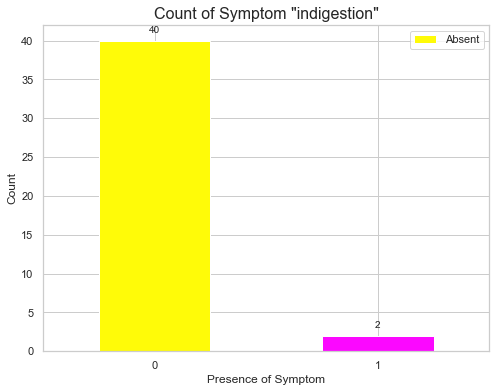

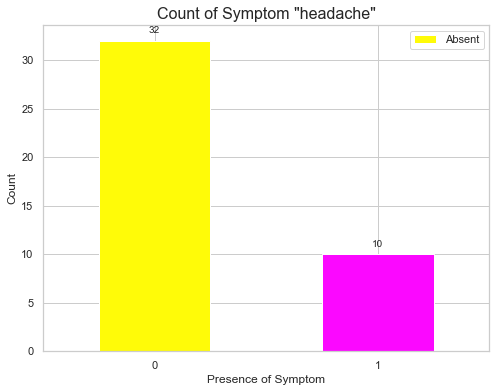

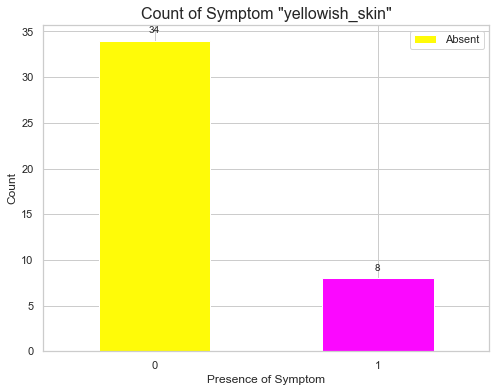

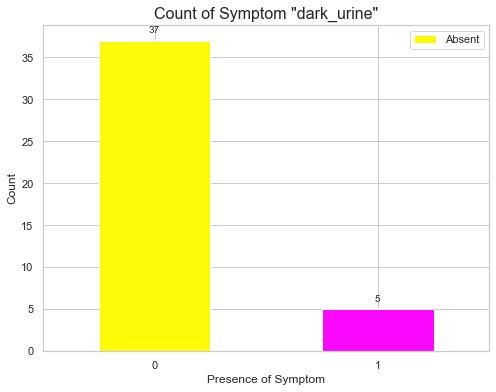

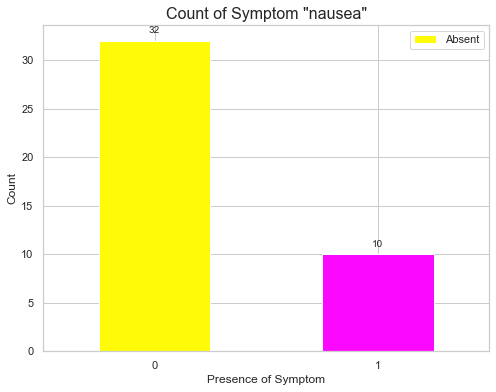

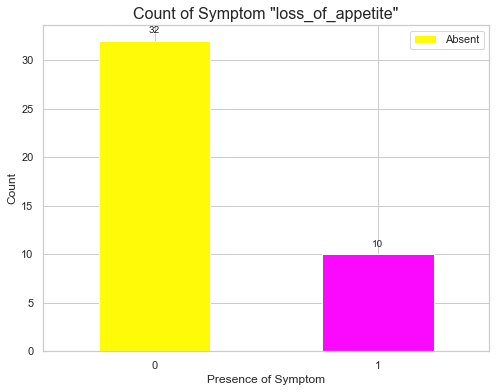

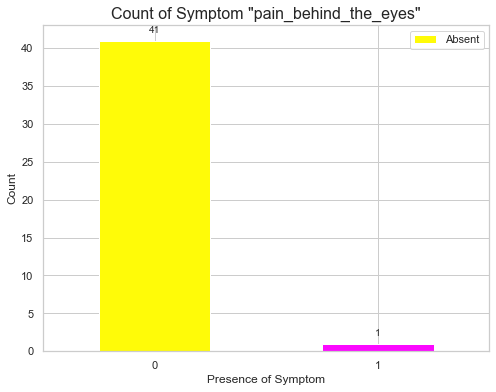

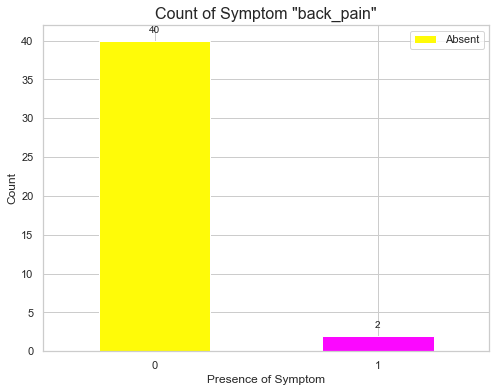

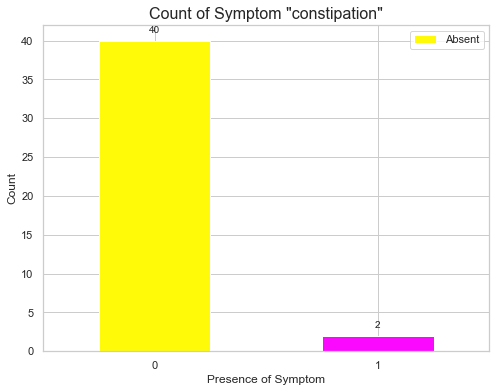

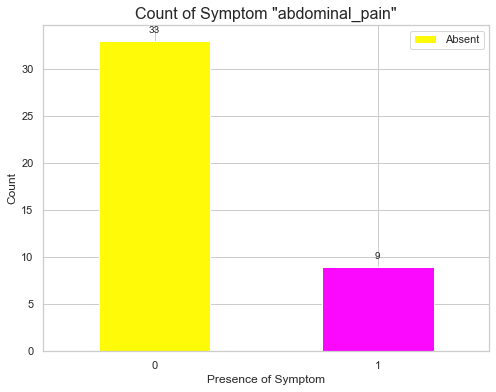

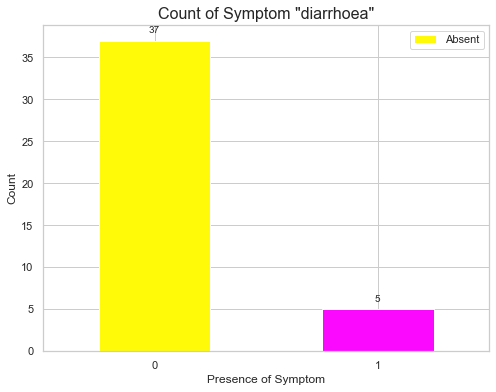

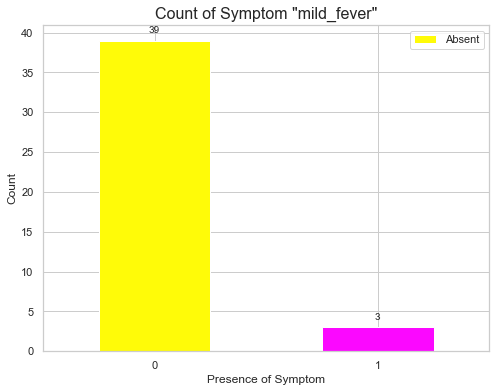

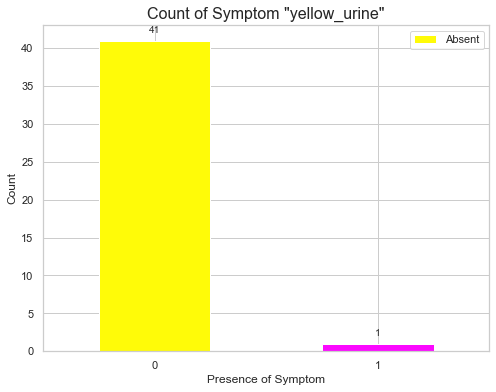

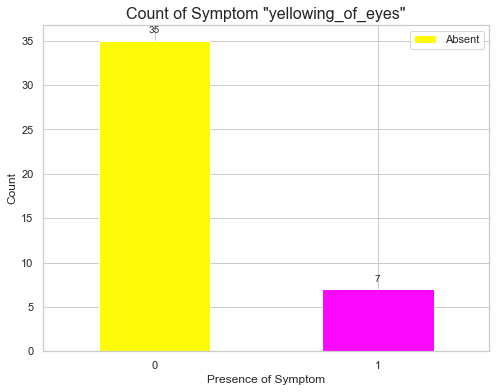

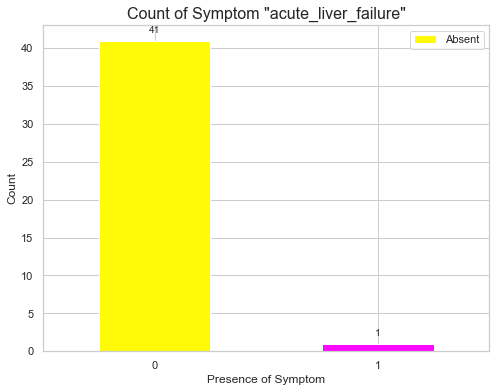

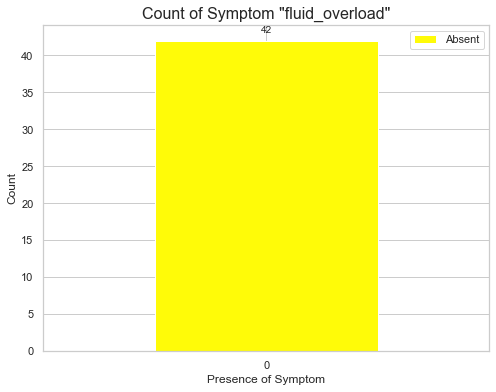

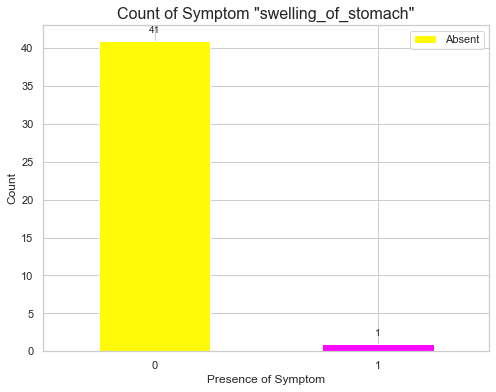

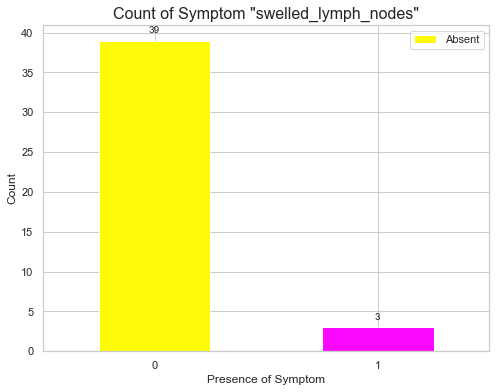

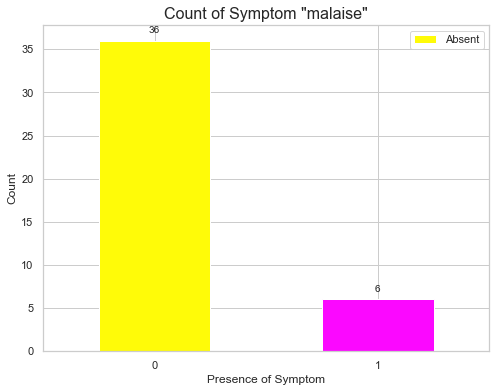

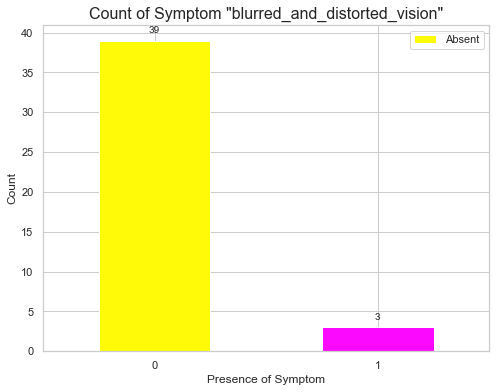

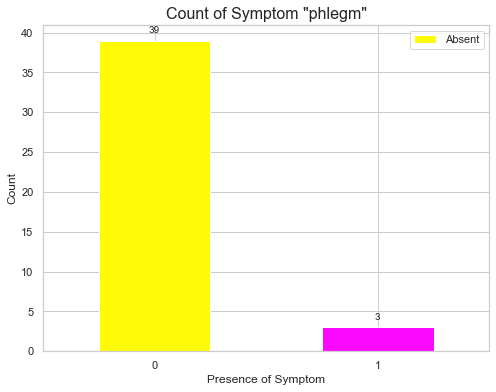

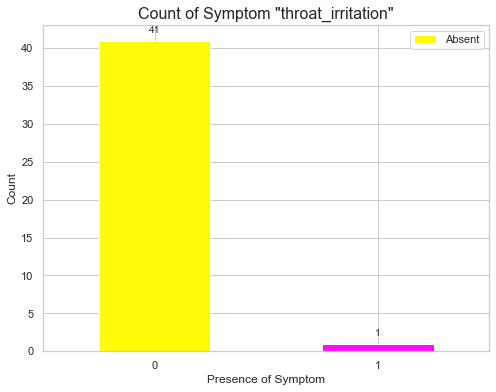

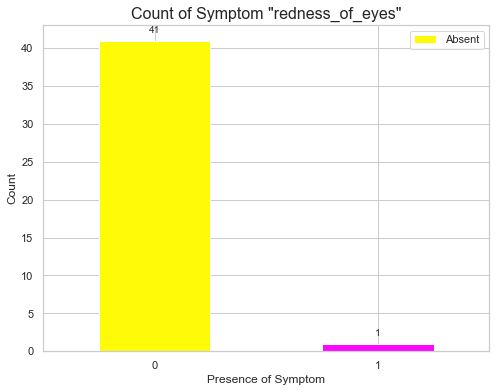

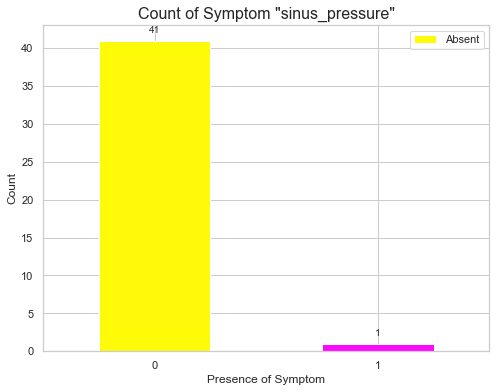

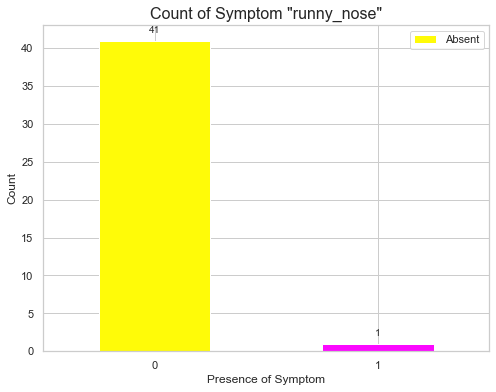

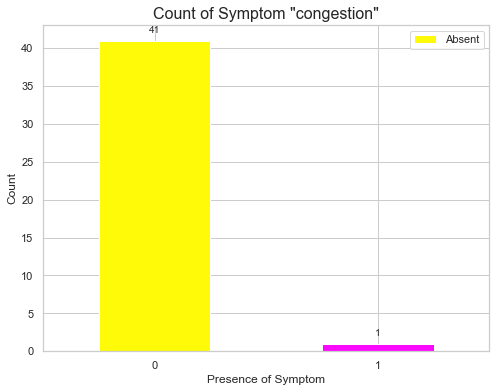

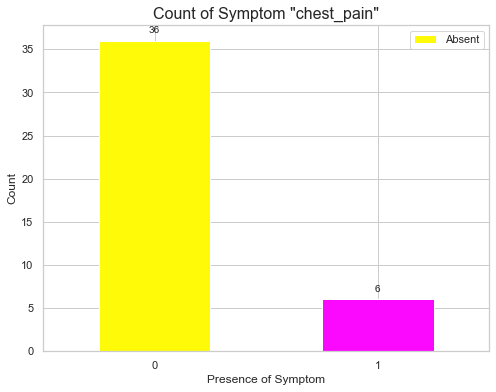

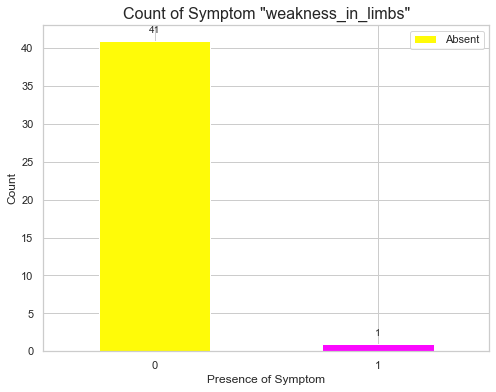

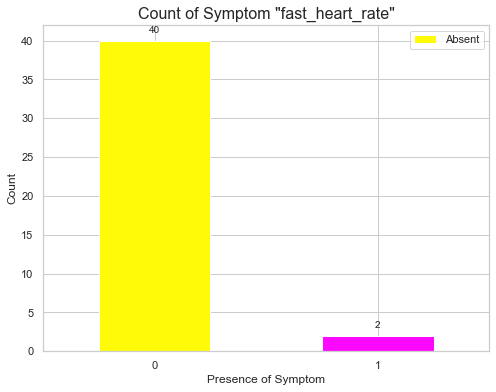

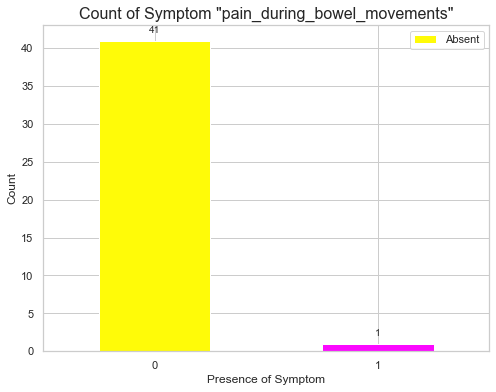

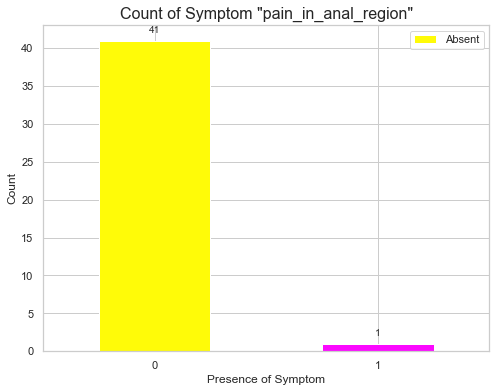

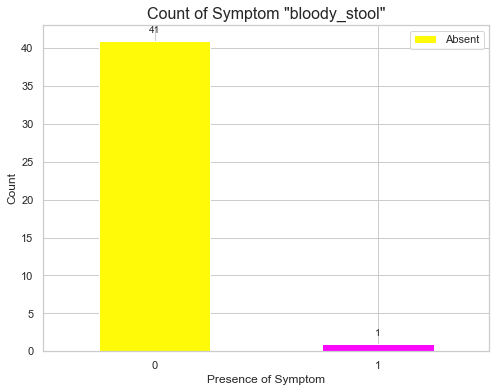

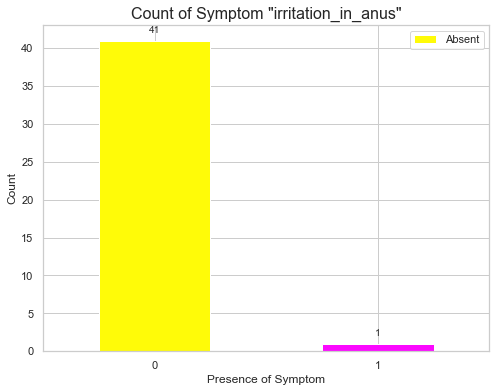

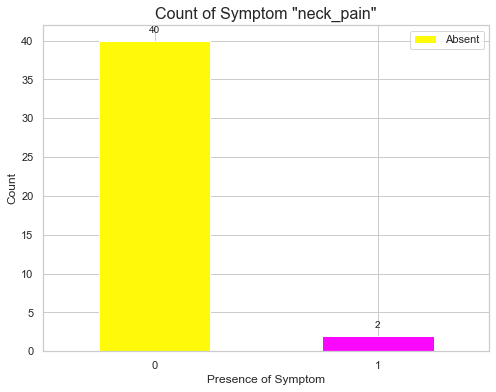

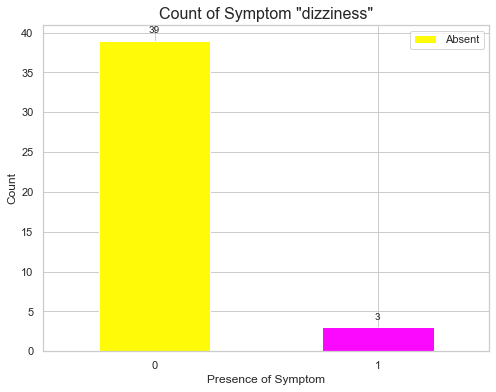

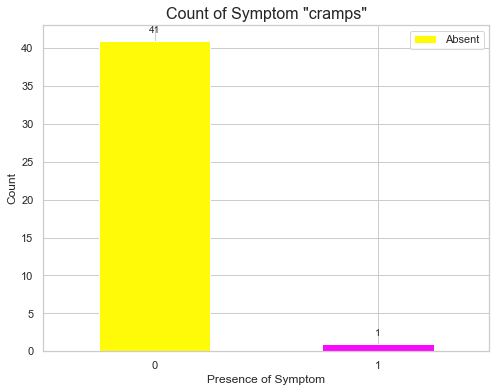

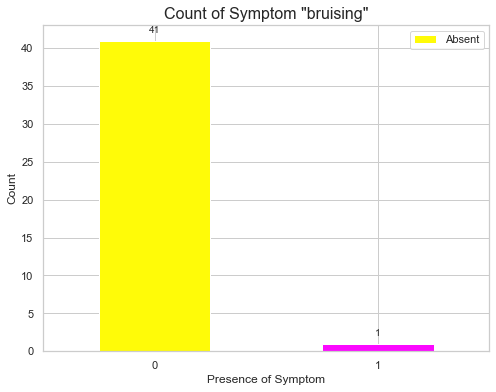

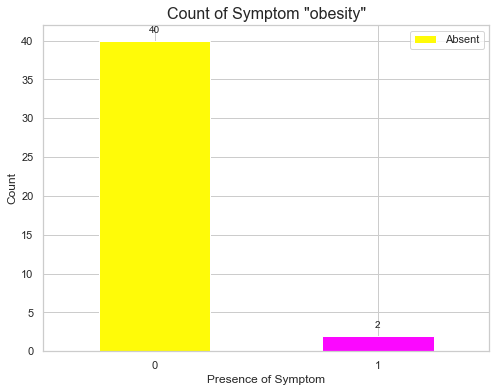

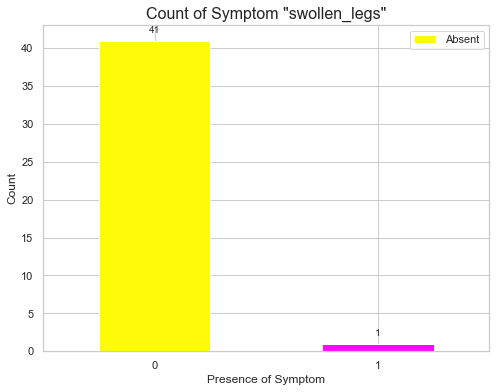

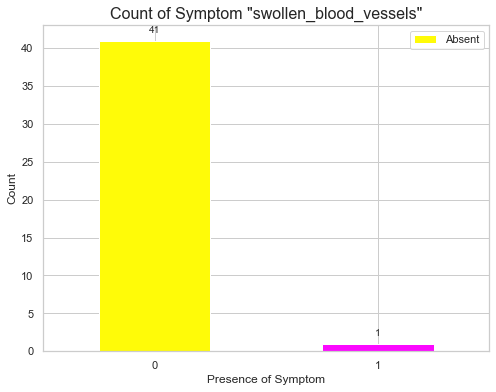

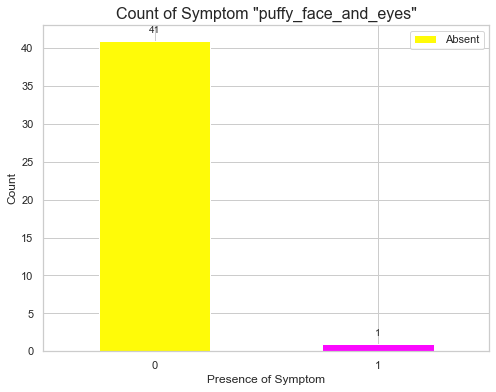

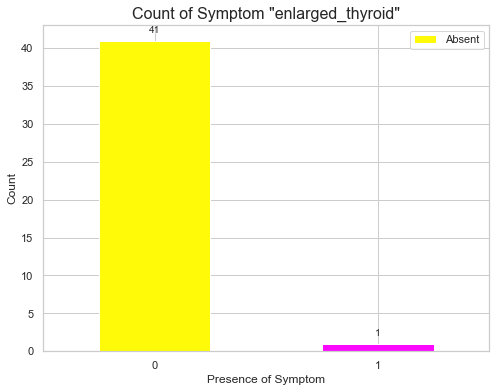

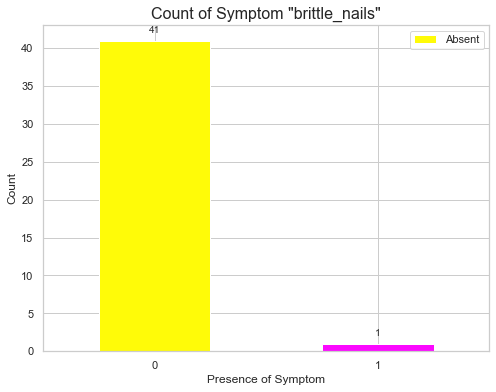

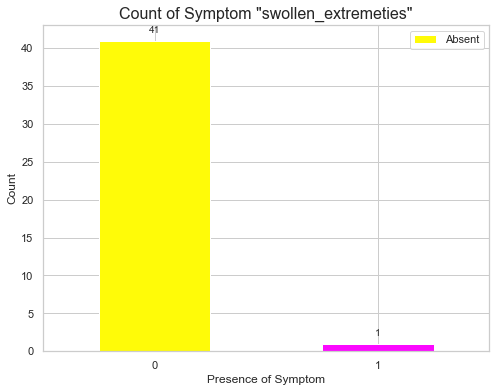

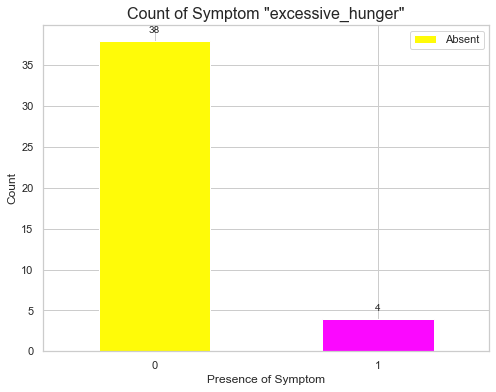

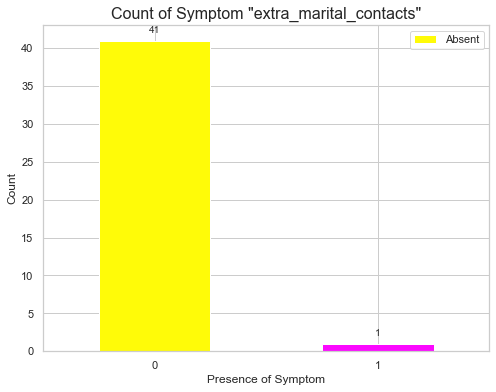

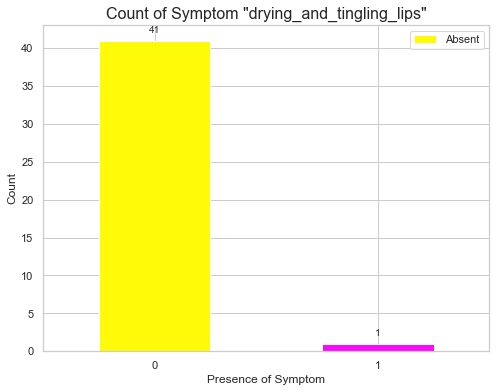

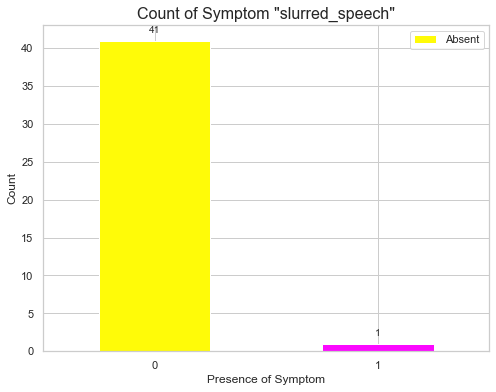

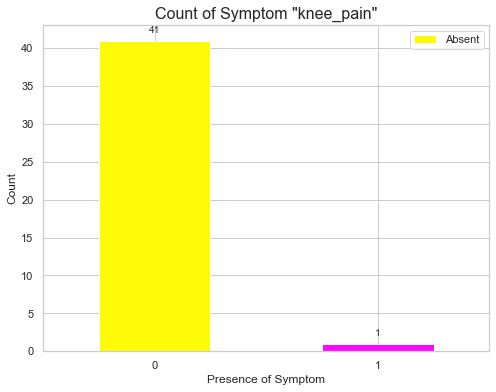

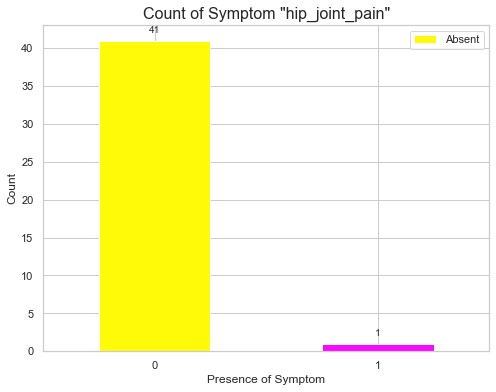

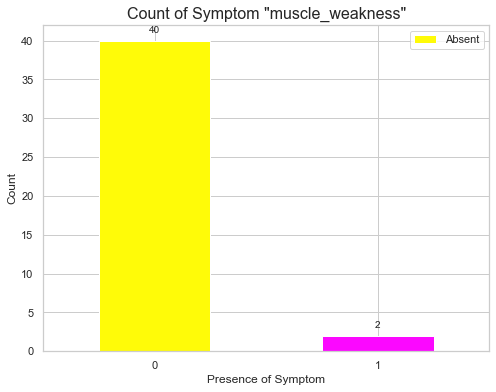

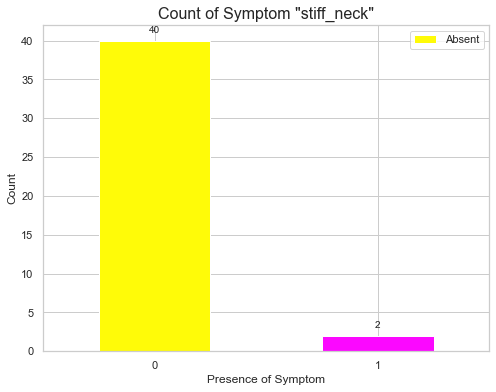

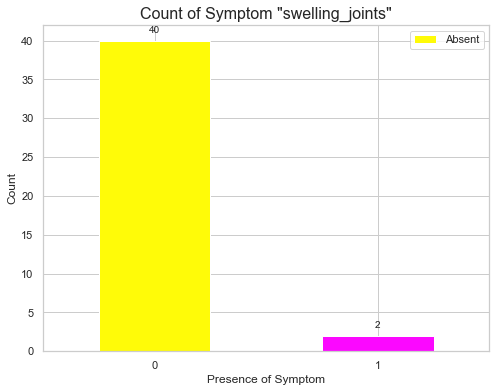

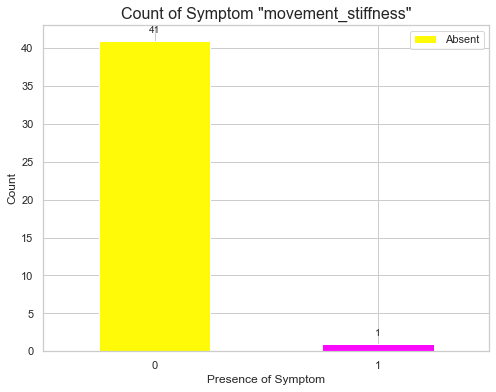

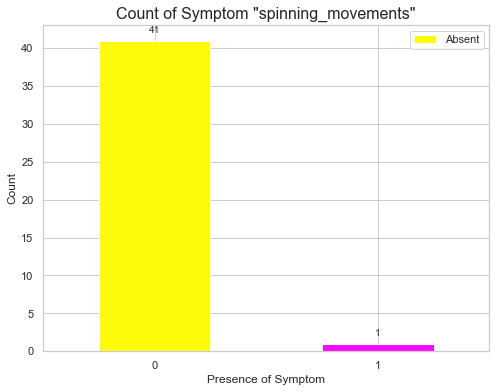

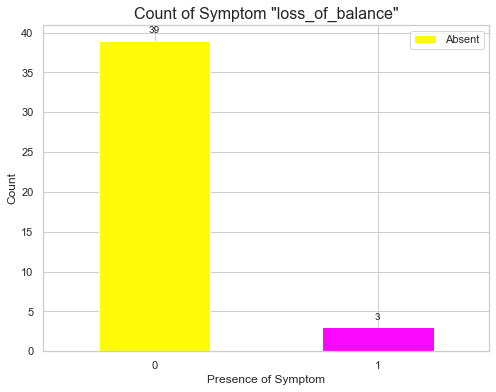

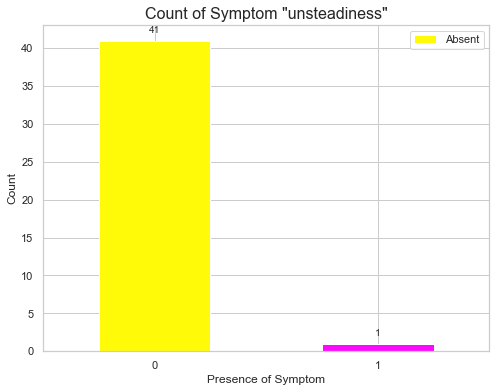

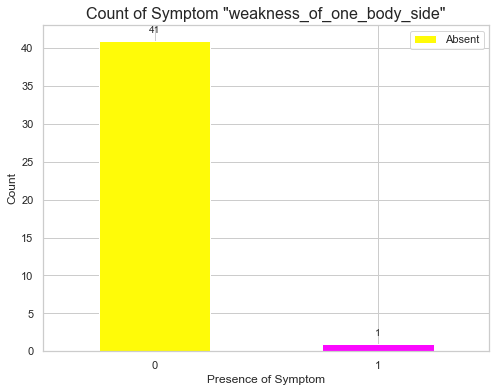

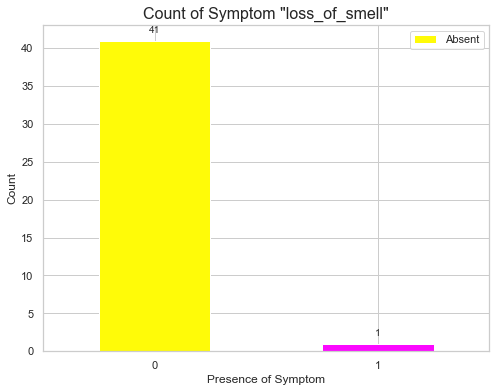

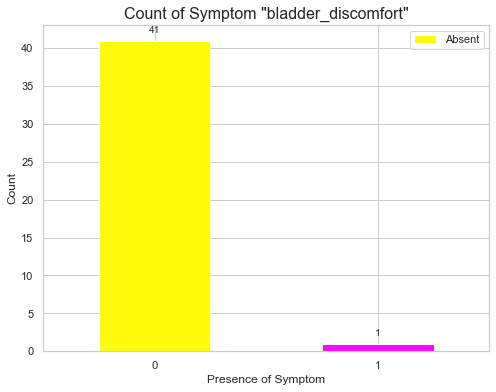

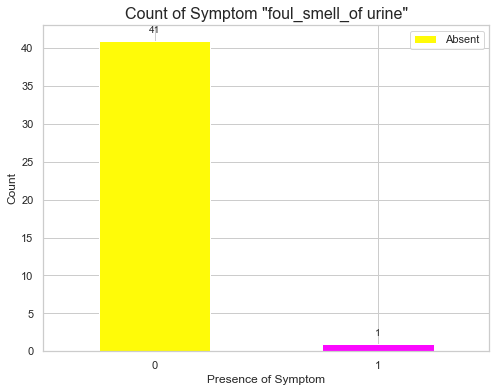

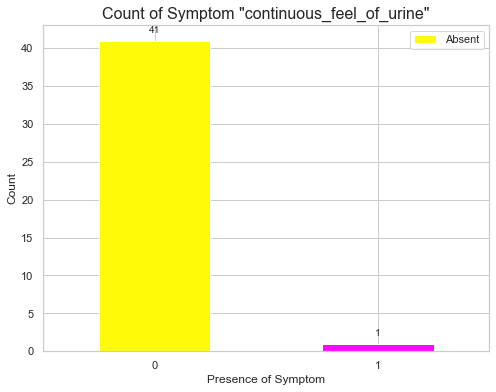

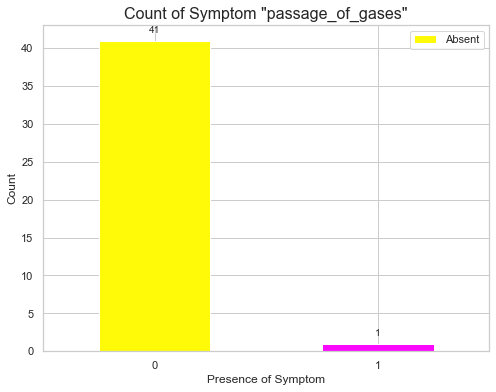

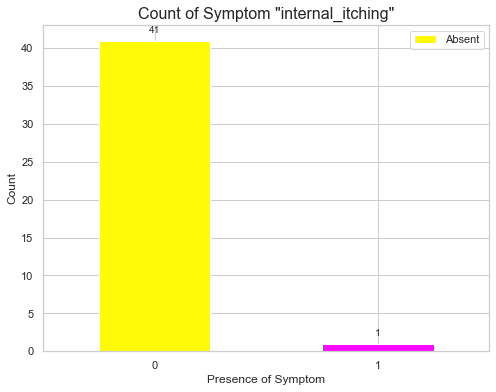

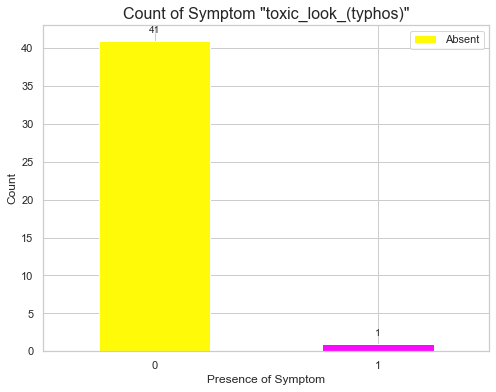

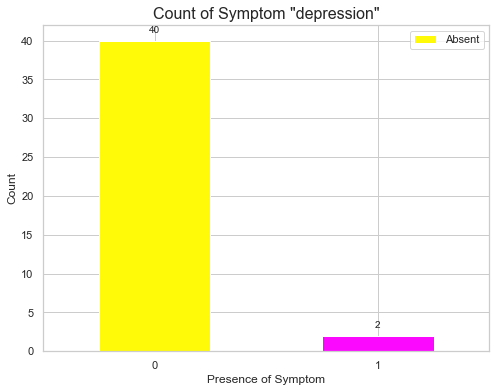

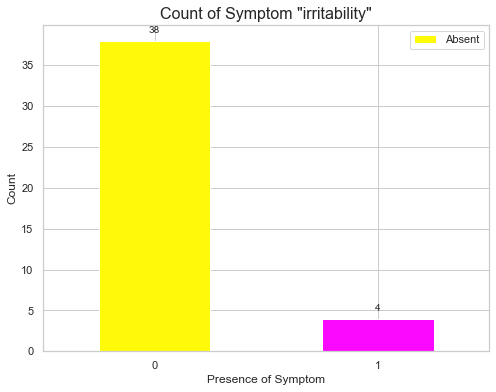

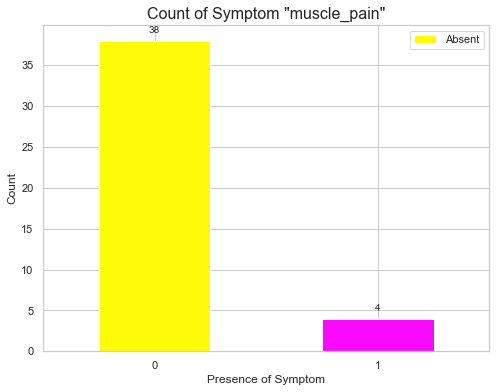

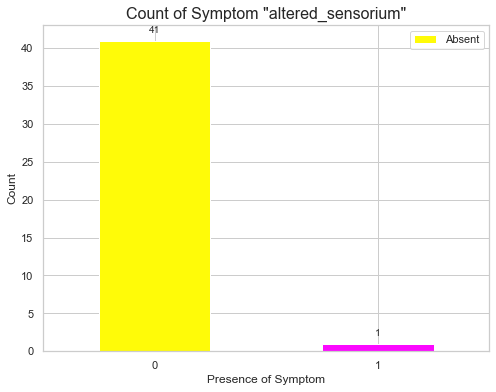

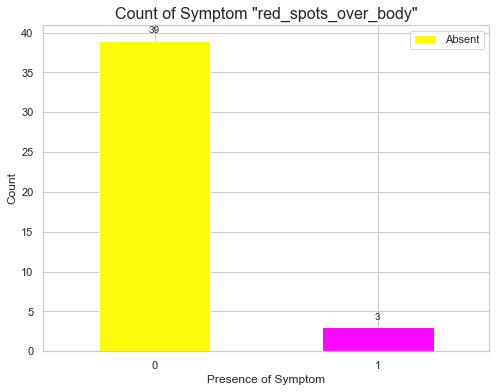

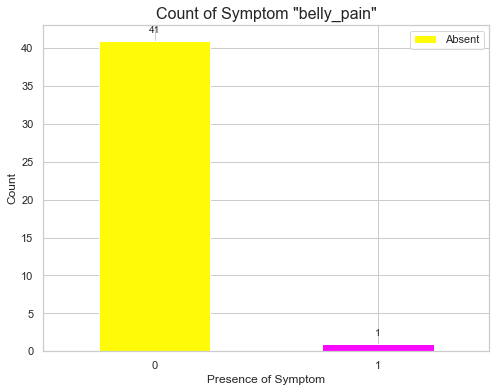

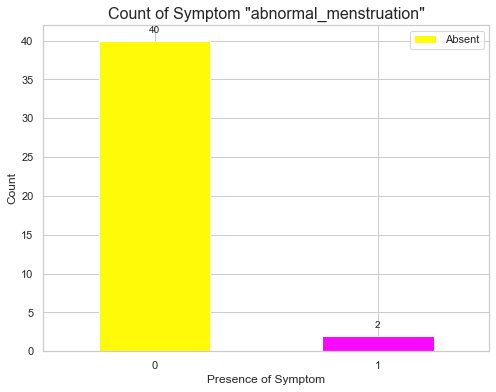

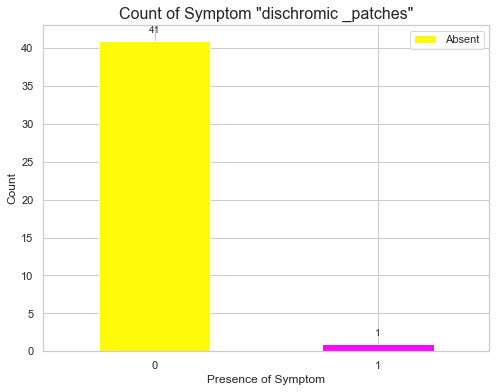

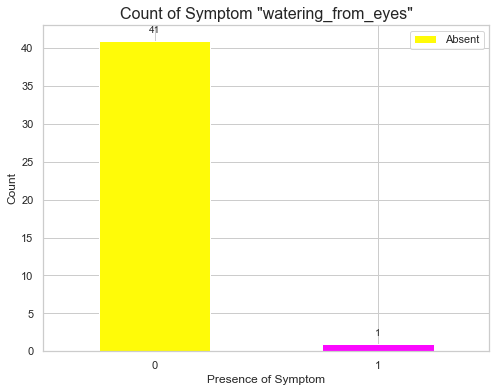

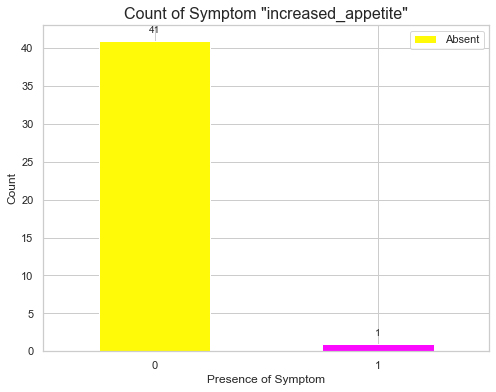

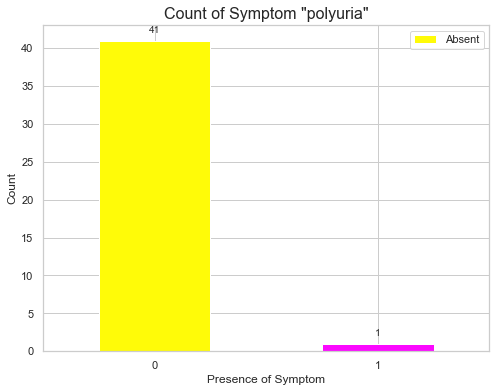

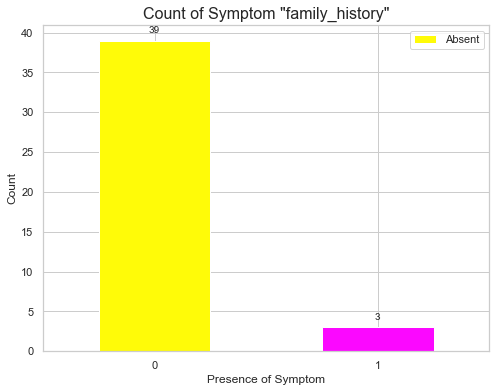

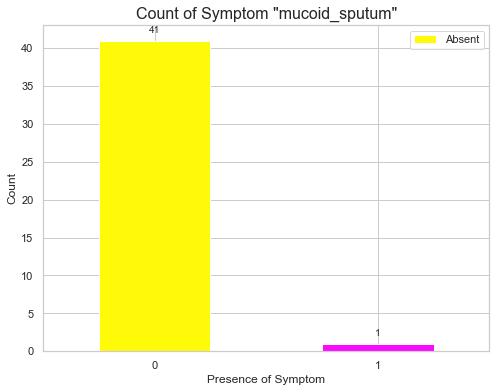

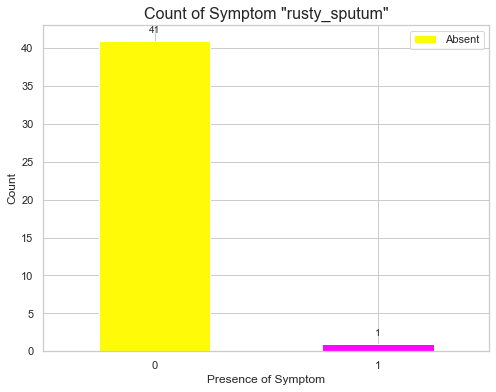

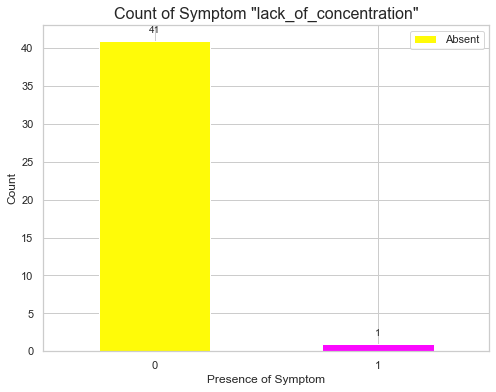

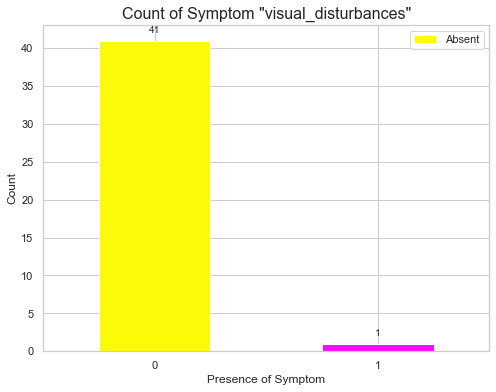

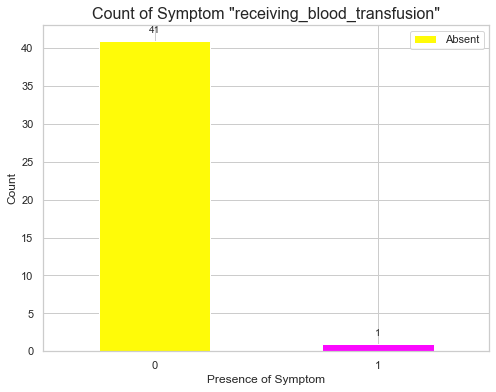

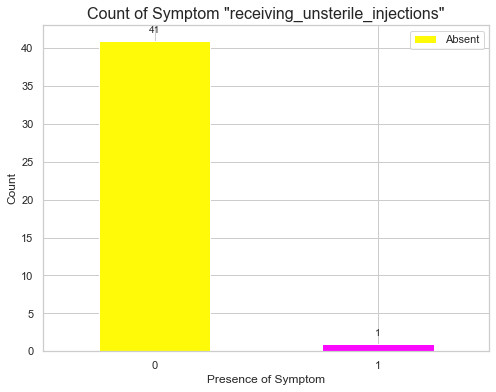

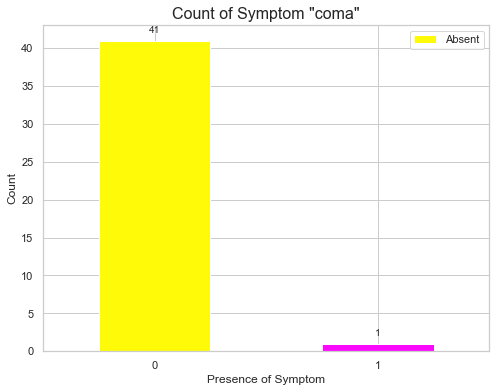

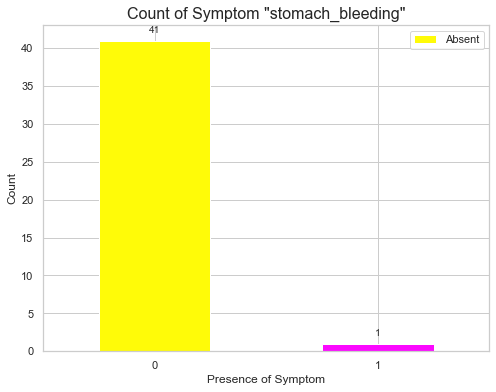

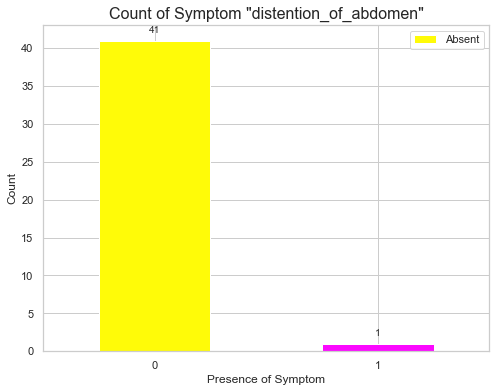

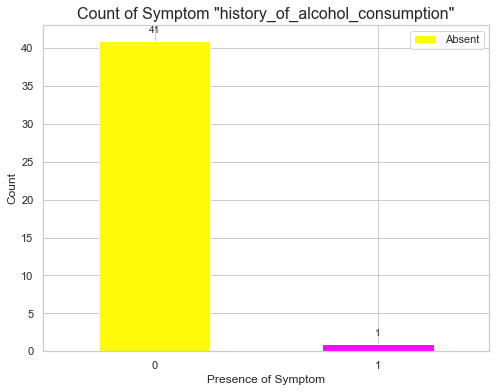

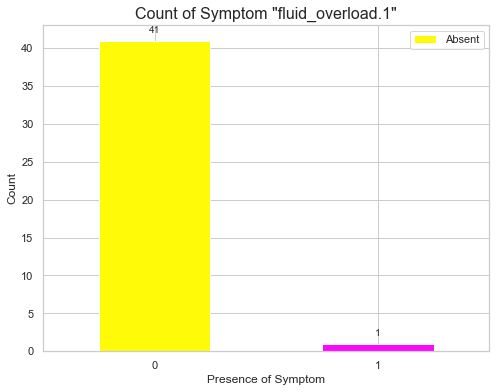

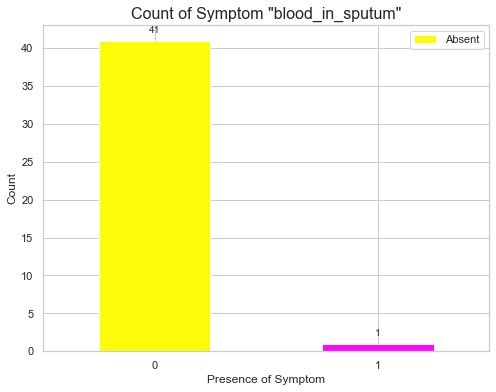

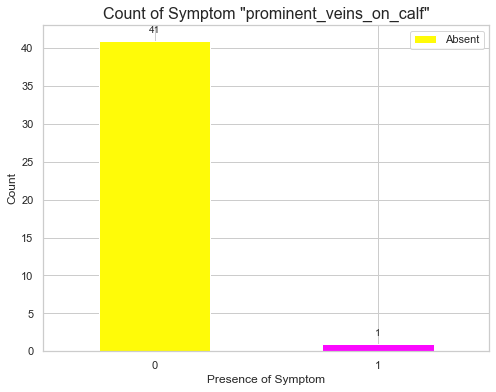

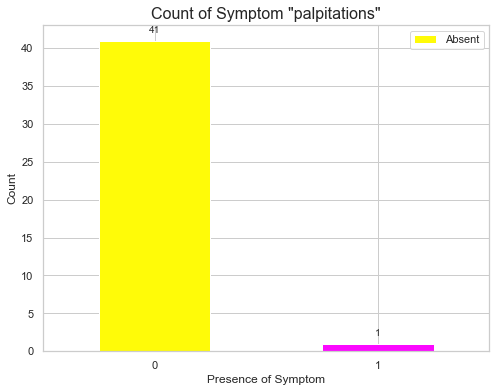

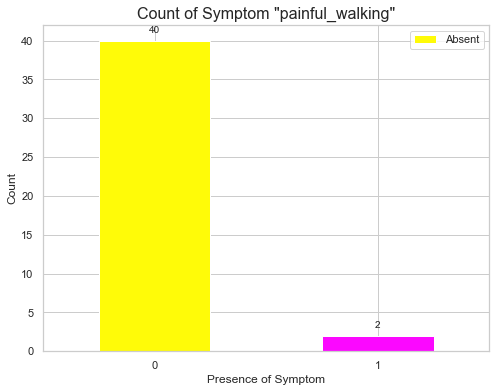

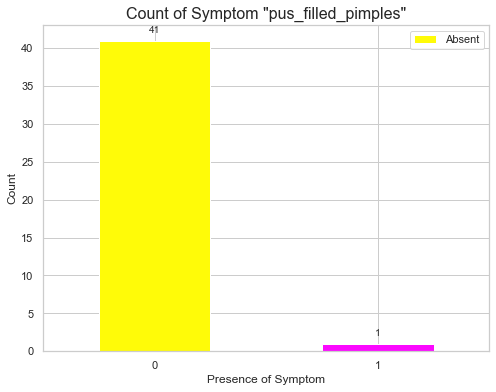

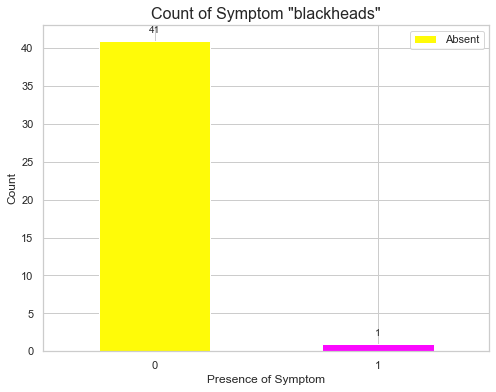

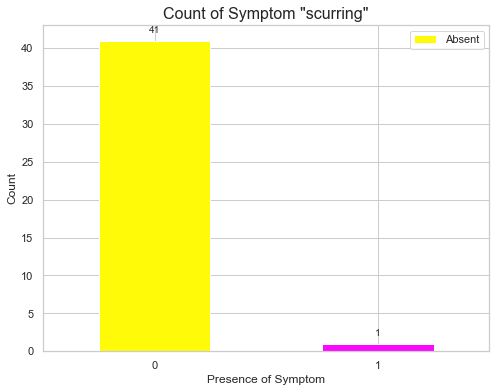

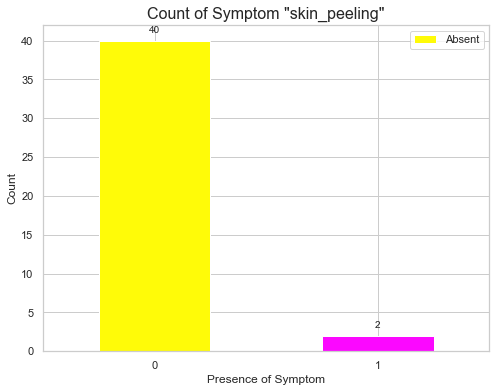

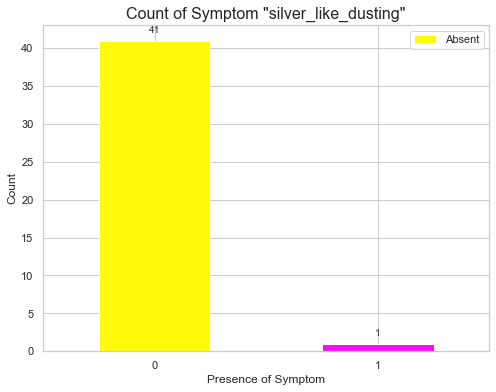

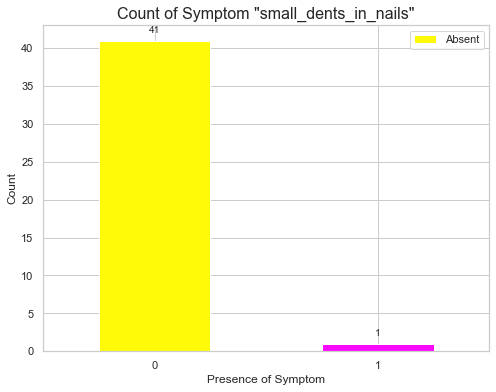

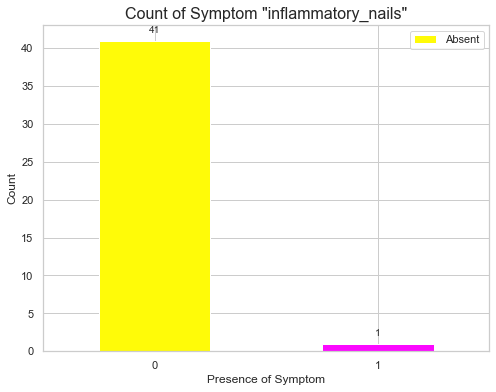

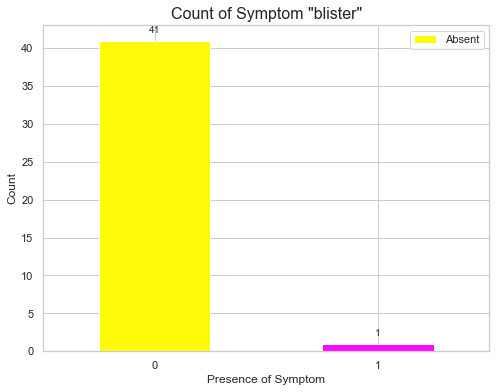

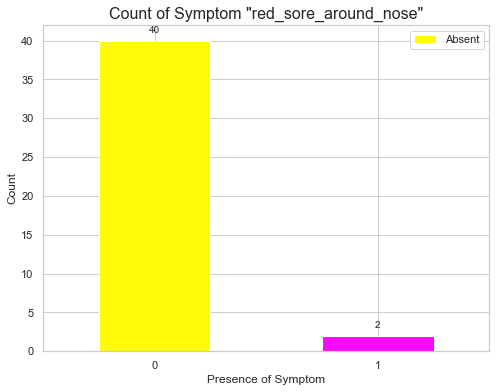

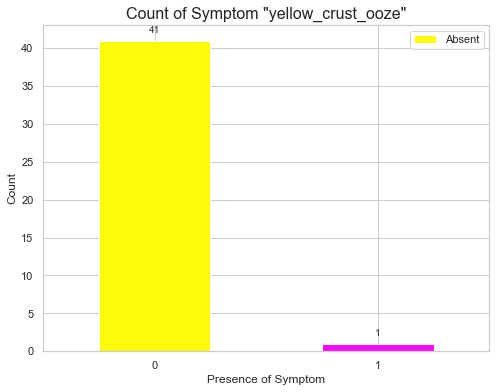

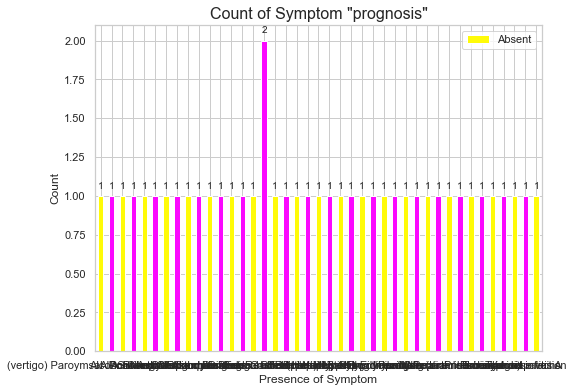

In [38]:
import matplotlib.pyplot as plt

# Assuming `columns` is a list of symptom names

colors = ['#fffb08', '#fb08ff']  # Red and Green colors
# barplot of the count for all symptoms' absence and presence
for i in columns:
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figsize for better visibility
    bar = dftest.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
    
    # Customizing plot appearance
    plt.xticks(rotation=0)
    plt.title("Count of Symptom \"" + i + "\"", fontsize=16)
    plt.xlabel("Presence of Symptom", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    
    # Customizing legend
    plt.legend(labels=['Absent', 'Present'], loc='upper right')
    
    # Adding data labels
    for p in bar.patches:
        plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
    
    plt.show()

In [39]:
dftrain.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples   blackheads     scurring  \
count       4920.000000  ...         4920.000000  4920.000000  4920.000000   
mean           0.021951  ...            0.021951     0.021951     0.021951   
std            0.146539  ...            0.146539     0.146539     0.146539   
min            0.000000  ...            0.000000     0.000000     0.000000   
25%            0.000000  ...            0.000000     0.000000     0.000000   
50%            0.000000  ...            0.000000     0.000000     0.000000   
75%            0.000000  ...            0.000000     0.000000     0.000000   
max            1.000000  ...            1.000000     1.000000     1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count   4920.000000          4920.000000           4920.000000   
mean       0.023171             0.023171              0.023171   
std        0.150461             0.150461              0.150461   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails      blister  red_sore_around_nose  \
count         4920.000000  4920.000000           4920.000000   
mean             0.023171     0.023171              0.023171   
std              0.150461     0.150461              0.150461   
min              0.000000     0.000000              0.000000   
25%              0.000000     0.000000              0.000000   
50%              0.000000     0.000000              0.000000   
75%              0.000000     0.000000              0.000000   
max              1.000000     1.000000              1.000000   

       yellow_crust_ooze  
count        4920.000000  
mean            0.023171  
std             0.150461  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 132 columns]

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math

# split dataset into attributes and labels
X_train = dftrain.iloc[:, :-1].values # the training attributes
y_train = dftrain.iloc[:, 132].values # the training labels
X_test = dftest.iloc[:, :-1].values # the testing attributes
y_test = dftest.iloc[:, 132].values # the testing labels

In [41]:
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [42]:
classifierRF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

In [43]:
classifierMLP = MLPClassifier()
classifierMLP.fit(X_train, y_train)

MLPClassifier()

In [44]:
y_predMLP = classifierMLP.predict(X_test)
y_predDT = classifierDT.predict(X_test)
y_predRF = classifierRF.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predMLP))
print(classification_report(y_test, y_predMLP))

# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, classifierMLP.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predMLP))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [46]:
print(confusion_matrix(y_test, y_predRF))
print(classification_report(y_test, y_predRF))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierRF.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predRF))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [47]:
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

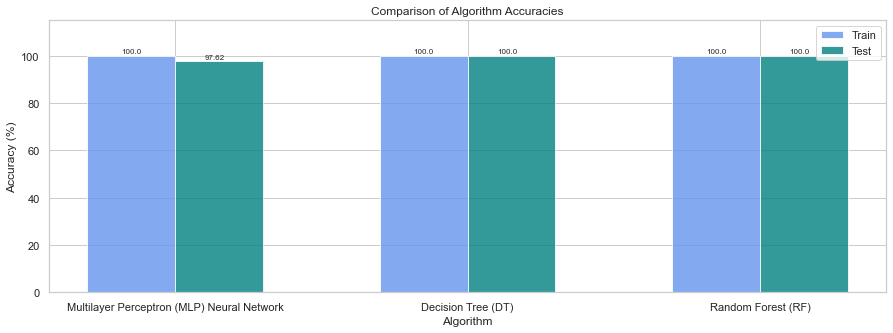

In [48]:
n_groups = 3
algorithms = ('Multilayer Perceptron (MLP) Neural Network', 'Decision Tree (DT)', 'Random Forest (RF)')
train_accuracy = (accuracy_score(y_train, classifierMLP.predict(X_train))*100, 
                  accuracy_score(y_train, classifierDT.predict(X_train))*100, 
                  accuracy_score(y_train, classifierRF.predict(X_train))*100)
test_accuracy = (accuracy_score(y_test, y_predMLP)*100, 
                 accuracy_score(y_test, y_predDT)*100, 
                 accuracy_score(y_test, y_predRF)*100)

# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
plt.show()

In [49]:
imp = classifierDT.feature_importances_
imp

array([0.03086132, 0.05380291, 0.00137527, 0.        , 0.00188551,
       0.02118936, 0.00714941, 0.00045525, 0.        , 0.00126828,
       0.00082164, 0.09358119, 0.00209956, 0.00655019, 0.15787755,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00237334, 0.        , 0.        , 0.00963786,
       0.05678624, 0.0009105 , 0.        , 0.00153758, 0.        ,
       0.00197966, 0.03304643, 0.01090322, 0.00255481, 0.03890301,
       0.06731474, 0.        , 0.00882158, 0.00062708, 0.03236418,
       0.01170182, 0.00841768, 0.        , 0.01957273, 0.        ,
       0.        , 0.        , 0.00045525, 0.03024364, 0.        ,
       0.        , 0.        , 0.        , 0.00045525, 0.        ,
       0.0081945 , 0.03993195, 0.        , 0.        , 0.01181628,
       0.        , 0.        , 0.        , 0.00266814, 0.01874675,
       0.00045525, 0.        , 0.00562691, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00136

In [50]:
columns = columns[:132]
column_names = ['symptom', 'importance']
df3 = np.vstack((columns, imp)).T
df3 = pd.DataFrame(df3, columns = column_names)
df3

symptom             importance
0                 itching    0.03086131930805611
1               skin_rash    0.05380291041928537
2    nodal_skin_eruptions  0.0013752740819393005
3     continuous_sneezing                    0.0
4               shivering   0.001885512330506976
..                    ...                    ...
127  small_dents_in_nails  0.0010823307529862541
128    inflammatory_nails   0.008132493127634782
129               blister   0.001303821527248525
130  red_sore_around_nose                    0.0
131     yellow_crust_ooze   0.010749695051767143

[132 rows x 2 columns]

In [51]:
coefficients = classifierDT.feature_importances_

# set a minimum threshold for feature importance
importance_threshold = np.quantile(coefficients, q = 0.75)
import plotly.express as px

# barplot of feature importance
fig = px.bar(x = coefficients, y = columns, orientation = 'h', color = coefficients, 
             color_continuous_scale = [(0, '#b7d2e8'), (1, '#295981')], labels = {'x': "Importance Value", 'y': "Feature"}, 
             title = "Feature Importance For Decision Tree Model")

# cut off value as the minimum threshold for feature importance
fig.add_vline(x = importance_threshold, line_color = 'red', line_width = 0.8)
fig.add_vrect(x0 = importance_threshold, x1 = 0, line_width = 0, fillcolor = 'red', opacity = 0.2)
fig.show()

In [52]:
import numpy
# identify features with feature importance values below the minimum threshold
low_importance_features = numpy.array(df3.symptom[np.abs(coefficients) <= importance_threshold])
columns = list(low_importance_features)
columns

['nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'burning_micturition',
 'spotting_ urination',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'dark_urine',
 'pain_behind_the_eyes',
 'constipation',
 'yellow_urine',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'weakness_in_limbs',
 'fast_heart_rate',
 'pain_in_anal_region',
 'bloody_stool',
 'irritation_in_anus',
 'neck_pain',
 'cramps',
 'bruising',
 'obesity',
 'swollen_legs',
 'swollen_blood_vessels',
 'puffy_face_and_eyes',
 'enlarged_thyroid',
 'brittle_nails',
 'swollen_extre

In [53]:
for i in columns :
    # drop low importance features
    dftrain.drop(i, axis=1, inplace=True)
    dftest.drop(i, axis=1, inplace=True)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   itching                         4920 non-null   int64 
 1   skin_rash                       4920 non-null   int64 
 2   chills                          4920 non-null   int64 
 3   vomiting                        4920 non-null   int64 
 4   fatigue                         4920 non-null   int64 
 5   cough                           4920 non-null   int64 
 6   high_fever                      4920 non-null   int64 
 7   headache                        4920 non-null   int64 
 8   yellowish_skin                  4920 non-null   int64 
 9   nausea                          4920 non-null   int64 
 10  loss_of_appetite                4920 non-null   int64 
 11  back_pain                       4920 non-null   int64 
 12  abdominal_pain                  4920 non-null   

In [54]:
X_train = dftrain.iloc[:, :-1].values # the training attributes
y_train = dftrain.iloc[:, 33].values # the training labels
X_test = dftest.iloc[:, :-1].values # the testing attributes
y_test = dftest.iloc[:, 33].values # the testing labels

# using DT based on information gain
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [55]:
y_predDT = classifierDT.predict(X_test)

# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       0.50      1.00      0.67         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

C:\Users\gowth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\gowth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\gowth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [56]:
newdata = [[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 
            0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1]]

# compute probabilities of assigning to each of the classes of prognosis
probaDT = classifierDT.predict_proba(newdata)

In [57]:
predDT = classifierDT.predict(newdata)
predDT

array(['Diabetes '], dtype=object)